■ 크롤링(Crawling)<br>
 ● 조직적 / 자동화된 방법으로 데이터를 탐색 / 수집 하는 것<br>
 ● 데이터 수집 절차
 - 원하는 URL에 request를 보내고 결과를 받는다
 - URL :  **uniform/universal resource locator**: 인터넷상의 파일 주소
 - 받은 결과물(HTML / JSON / XML)을 파싱(Parsing)한다<Br>
 - 필요한 정보만 추출한다<Br>
● 파이썬에서 크롤링을 하기 위해 필요한 **라이브러리**
 - 데이터 통신 : **requests** / urllib / urllib2
 - 파싱 : bs4 (BeautifulSoup)

requests 설치 : conda install requests

In [ ]:
import requests

result = requests.get('http://ggoreb.com/http')

In [ ]:
result.status_code #잘 받아왔으면 200, 잘못 받아오면 404

In [ ]:
result.encoding = 'utf-8'

In [ ]:
result.text

In [ ]:
type(result.text)

In [ ]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'euc-kr'
    html = res.text
    return html

In [ ]:
import requests
res = requests.get('http://ggoreb.com/python/request.jsp')
print(res.status_code)
print(res.text)

In [ ]:
import requests
param = { 'age': 30, 'name': 'python','gender' : 'Male' }
res = requests.get('http://ggoreb.com/python/request.jsp', params=param)
print(res.text)

In [ ]:
import requests
header = { 'accept-language':'en'}
res = requests.get('http://youtube.com', headers=header)
print(res.status_code)
print(res.text)

In [ ]:
import requests
result = get_html('http://ggoreb.com/python/html/data1.html')
result

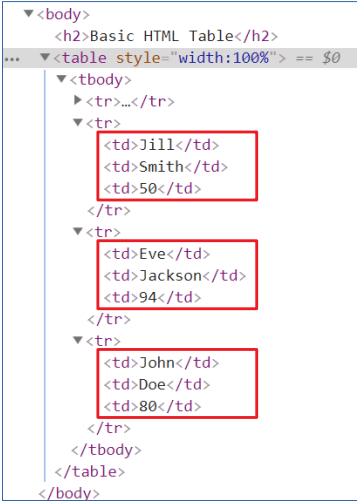

In [ ]:
s_idx = 0 #td가 시작하는 곳 
e_idx = 0 # / 로 끝내는 곳 
while True:
    s_idx = result.find('<td>', s_idx) #td를 찾아라. 
    if s_idx == -1: break
    e_idx = result.find('</td>', s_idx) # / 를 찾아라. 
    print(result[s_idx+4:e_idx])
    s_idx = e_idx
    
    

In [ ]:
result = get_html('http://finance.naver.com/')
result

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(result, 'html.parser')

In [ ]:
nums = soup.select('.num_quot>.num')
for num in nums :
    print(num.getText())

In [ ]:
import requests
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://ggoreb.com/python/html/number.html'
res = requests.get(address)
res.encoding = 'euc-kr'

imgs = soup.select('img')
for img in imgs:
    print(img['alt'])



In [ ]:
import requests
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://ggoreb.com/python/html/attribute.html'
res = requests.get(address)
res.encoding = None

imgs = soup.select('img')
for img in imgs:
    print(img['title'])


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
address = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
res = requests.get(address)
res.encoding = None

In [ ]:
res.text

In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
a_list=soup.select('.tit3>a')
for a in a_list:
    
    print(a.getText())
          

In [ ]:

from bs4 import BeautifulSoup as bs
import requests

In [ ]:
res = requests.get(address)
res.encoding = None
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://www.wemakeprice.com/main/100030'



w_list = soup.select('.box_desc>.tit_desc')
for w in w_list:
     print(w.getText())


In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')
address = 'https://www.coupang.com/np/categories/178951'
res = requests.get(address)
res.encoding = None


c_list = soup.select('.dd.descriptions div name')
c_list

select <= List 한개
find <= obj 여러개 
find_all <= obj 여러개 

In [ ]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/html/example.html')
soup = BeautifulSoup(res.text, 'html.parser')
div= soup.find('div',{'class' : 'ex_class'}) #첫번째 div 를 가져옴. 

print(div.find('p'))

In [ ]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://comic.naver.com/webtoon/list.nhn?titleId=670144&weekday=thu')
soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:

titles= soup.select('td.title > a')
# for title in titles:
#     print(title.getText())
nums = soup.select('td.num')
for num in nums :
    print(num.getText())

JSON  사용하기 (beautiful soup 사용 X)

In [ ]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/json/data2.jsp')
result = res.json()
for r in result:
    print(r['name'], r['age'])

In [ ]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/json/data3.jsp')
result = res.json()
result

In [ ]:
for obj in result:
    address = obj['address']
    for o in address:
            print(o, end=' ')
            


### 카카오 지도 API

In [ ]:
import requests
from bs4 import BeautifulSoup
address = 'https://dapi.kakao.com/v2/local/search/address.json'
params = {'query' : '서울 특별시 동작구 신대방동 395'}
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}

res = requests.get(address, params=params, headers=headers)
res.encoding = None
res

In [ ]:
res.json()

In [ ]:
soup = bs(res.text, 'html.parser')
address_list = soup.find_all('address')
for addr in address_list:
    x = addr.find('x')
    y = addr.find('y')
    name = addr.find('address_name')
    print(x, y, name)

### 카카오 번역 API 사용

In [ ]:
import requests
from bs4 import BeautifulSoup
address = 'https://kapi.kakao.com/v1/translation/translate'
params = {'query' : '배고프다', 'src_lang': 'kr', 'target_lang':'jp' }
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}

res = requests.get(address, params=params, headers=headers)
res.encoding = None
res

In [ ]:
text = res.json()['translated_text']
print(text[0][0])